# SCS_3253_047 Machine Learning

### Final Project: April 5th, 2022

### Team members:

* Lucas Merrick
* Amitha Pillai
* Michael Tan
* Herbert Gnanaraja Richard Sundarrajan

### Project Overview:

The scientific objective of the Kepler Mission is to explore the structure and diversity of planetary systems, using a special-purpose spacecraft to measure light variations from thousands of distant stars, looking for planetary transits.


Kepler Objects of Interest (KOIs) are well vetted, periodic, transit-like events in the Kepler data. The Kepler Project identifies these objects from the Threshold-Crossing Events (TCE) list for further vetting. Some objects will be flagged as false positives.

### Objective: 
Predict classification of KOI from Kepler data (exoplanet candidate or false positive)

### Data Exploration:

* Dataset with 82 features, 9564 instances
    * Identification Columns, Exoplanet Archive Information, Project Disposition Columns
    * Transit Properties, Threshold-Crossing Event (TCE) Information, Stellar Parameters, Kepler Input Catalog (KIC) Parameters, Pixel-Based KOI Vetting Statistics


* Plot scatter matrix of features to evaluate data distributions, trends and understand relationship with other features
    * Mix of distributions: majority left/right skewed, some normally distributed
    * Some outliers observed


* Plot correlation to identify redundant features
    * High correlation found in subset of features
    
### Data source and acknowledgement:
This research has made use of the NASA Exoplanet Archive, which is operated by the California Institute of Technology, under contract with the National Aeronautics and Space Administration under the Exoplanet Exploration Program.

https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=cumulative

# 1. Data preparation & Exploratory data analysis

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
%matplotlib inline

### Load data

In [4]:
pathToFile = r"dataset/"
fileName = 'cumulative_values.csv'

In [5]:
rows = 86 # skip rows with column descriptions - only use this for file directly downloaded from archive

data = pd.read_csv(pathToFile+fileName, skiprows=rows, sep=",", index_col=0) # create dataframe
pd.set_option('display.max_columns', None) # show all columns

### Inspect data

In [6]:
data.head()

kepid kepoi_name   kepler_name koi_disposition koi_vet_stat  \
rowid                                                                   
1      10797460  K00752.01  Kepler-227 b       CONFIRMED         Done   
2      10797460  K00752.02  Kepler-227 c       CONFIRMED         Done   
3      10811496  K00753.01           NaN       CANDIDATE         Done   
4      10848459  K00754.01           NaN  FALSE POSITIVE         Done   
5      10854555  K00755.01  Kepler-664 b       CONFIRMED         Done   

      koi_vet_date koi_pdisposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  \
rowid                                                                          
1       2018-08-16        CANDIDATE      1.000              0              0   
2       2018-08-16        CANDIDATE      0.969              0              0   
3       2018-08-16        CANDIDATE      0.000              0              0   
4       2018-08-16   FALSE POSITIVE      0.000              0              1   
5       2018-08-16        CANDIDATE      1.000              0              0   

       koi_fpflag_co  koi_fpflag_ec        koi_disp_prov  \
rowid                                                      
1                  0              0  q1_q17_dr25_sup_koi   
2                  0              0  q1_q17_dr25_sup_koi   
3                  0              0  q1_q17_dr25_sup_koi   
4                  0              0  q1_q17_dr25_sup_koi   
5                  0              0  q1_q17_dr25_sup_koi   

                                            koi_comment  koi_period  \
rowid                                                                 
1                                            NO_COMMENT    9.488036   
2                                            NO_COMMENT   54.418383   
3                                         DEEP_V_SHAPED   19.899140   
4      MOD_ODDEVEN_DV---MOD_ODDEVEN_ALT---DEEP_V_SHAPED    1.736952   
5                                            NO_COMMENT    2.525592   

       koi_time0bk    koi_time0  koi_eccen  koi_longp  koi_impact  \
rowid                                                               
1       170.538750  2455003.539        0.0        NaN       0.146   
2       162.513840  2454995.514        0.0        NaN       0.586   
3       175.850252  2455008.850        0.0        NaN       0.969   
4       170.307565  2455003.308        0.0        NaN       1.276   
5       171.595550  2455004.596        0.0        NaN       0.701   

       koi_duration  koi_ingress  koi_depth   koi_ror  koi_srho koi_fittype  \
rowid                                                                         
1           2.95750          NaN      615.8  0.022344   3.20796     LS+MCMC   
2           4.50700          NaN      874.8  0.027954   3.02368     LS+MCMC   
3           1.78220          NaN    10829.0  0.154046   7.29555     LS+MCMC   
4           2.40641          NaN     8079.2  0.387394   0.22080     LS+MCMC   
5           1.65450          NaN      603.3  0.024064   1.98635     LS+MCMC   

       koi_prad  koi_sma  koi_incl  koi_teq  koi_insol  koi_dor  \
rowid                                                             
1          2.26   0.0853     89.66    793.0      93.59   24.810   
2          2.83   0.2734     89.57    443.0       9.11   77.900   
3         14.60   0.1419     88.96    638.0      39.30   53.500   
4         33.46   0.0267     67.09   1395.0     891.96    3.278   
5          2.75   0.0374     85.41   1406.0     926.16    8.750   

                        koi_limbdark_mod  koi_ldm_coeff4  koi_ldm_coeff3  \
rowid                                                                      
1      Claret (2011 A&A 529 75) ATLAS LS             0.0             0.0   
2      Claret (2011 A&A 529 75) ATLAS LS             0.0             0.0   
3      Claret (2011 A&A 529 75) ATLAS LS             0.0             0.0   
4      Claret (2011 A&A 529 75) ATLAS LS             0.0             0.0   
5      Claret (2011 A&A 529 75) ATLAS LS             0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9564 entries, 1 to 9564
Data columns (total 82 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   kepler_name        2670 non-null   object 
 3   koi_disposition    9564 non-null   object 
 4   koi_vet_stat       9564 non-null   object 
 5   koi_vet_date       9564 non-null   object 
 6   koi_pdisposition   9564 non-null   object 
 7   koi_score          8054 non-null   float64
 8   koi_fpflag_nt      9564 non-null   int64  
 9   koi_fpflag_ss      9564 non-null   int64  
 10  koi_fpflag_co      9564 non-null   int64  
 11  koi_fpflag_ec      9564 non-null   int64  
 12  koi_disp_prov      9564 non-null   object 
 13  koi_comment        8355 non-null   object 
 14  koi_period         9564 non-null   float64
 15  koi_time0bk        9564 non-null   float64
 16  koi_time0          9564 

### Scrub data

In [8]:
# remove columns with documentation data - not required for model
skip_attr = [ 
    'koi_fittype', 
    'koi_limbdark_mod', 
    'koi_parm_prov', 
    'koi_tce_delivname',
    'koi_quarters',
    'koi_trans_mod',
    'koi_datalink_dvr',
    'koi_datalink_dvs',
    'koi_sparprov'
]

df = data.iloc[:, 14:] # remove first 13 columns of identification and target data (includes koi_fpflag_xx)
df.drop(skip_attr, axis=1, inplace=True) # drop columns with documentation data
df.shape

(9564, 59)

In [9]:
df_clean = df.dropna(axis=1, how='all') # drop all NaN/null columns
df_clean = df_clean.loc[:, (df_clean.sum(axis=0) != 0)] # drop all columns with zero data
df_clean.shape

(9564, 51)

In [19]:
target_attr = 'koi_pdisposition'
target_vals = {'CANDIDATE': 1, 'FALSE POSITIVE': 0}
df_clean[target_attr] = data[target_attr].map(target_vals) # get prediction labels

In [11]:
df_clean.describe()

koi_period  koi_time0bk     koi_time0   koi_impact  koi_duration  \
count    9564.000000  9564.000000  9.564000e+03  9201.000000   9564.000000   
mean       75.671358   166.183251  2.454999e+06     0.735105      5.621606   
std      1334.744046    67.918960  6.791896e+01     3.348832      6.471554   
min         0.241843   120.515914  2.454954e+06     0.000000      0.052000   
25%         2.733684   132.761718  2.454966e+06     0.197000      2.437750   
50%         9.752831   137.224595  2.454970e+06     0.537000      3.792600   
75%        40.715178   170.694603  2.455004e+06     0.889000      6.276500   
max    129995.778400  1472.522306  2.456306e+06   100.806000    138.540000   

          koi_depth      koi_ror     koi_srho       koi_prad      koi_sma  \
count  9.201000e+03  9201.000000  9243.000000    9201.000000  9201.000000   
mean   2.379134e+04     0.283646     9.164414     102.891778     0.223989   
std    8.224268e+04     3.306558    53.807967    3077.639126     0.566359   
min    0.000000e+00     0.001289     0.000040       0.080000     0.005900   
25%    1.599000e+02     0.012341     0.229250       1.400000     0.037700   
50%    4.211000e+02     0.021076     0.956720       2.390000     0.085100   
75%    1.473400e+03     0.095348     2.897175      14.930000     0.214400   
max    1.541400e+06    99.870651   980.854190  200346.000000    44.989200   

          koi_incl       koi_teq     koi_insol       koi_dor  koi_ldm_coeff2  \
count  9200.000000   9201.000000  9.243000e+03   9201.000000     9201.000000   
mean     82.469147   1085.385828  7.745737e+03     76.736333        0.254439   
std      15.223627    856.351161  1.592047e+05    845.274598        0.064806   
min       2.290000     25.000000  0.000000e+00      0.373000       -0.120600   
25%      83.920000    539.000000  2.015000e+01      5.358000        0.228600   
50%      88.500000    878.000000  1.416000e+02     15.460000        0.271100   
75%      89.770000   1379.000000  8.702900e+02     45.370000        0.299800   
max      90.000000  14667.000000  1.094755e+07  79614.000000        0.482200   

       koi_ldm_coeff1  koi_max_sngle_ev  koi_max_mult_ev  koi_model_snr  \
count     9201.000000       8422.000000      8422.000000    9201.000000   
mean         0.407617        176.846052      1025.664672     259.895001   
std          0.106076        770.902357      4154.121620     795.806615   
min          0.125400          2.417437         7.105086       0.000000   
25%          0.326800          3.997856        10.733030      12.000000   
50%          0.392000          5.589751        19.254411      23.000000   
75%          0.464100         16.947631        71.998003      78.000000   
max          0.948600      22982.162000    120049.680000    9054.700000   

         koi_count  koi_num_transits  koi_tce_plnt_num  koi_bin_oedp_sig  \
count  9564.000000       8422.000000       9218.000000       8054.000000   
mean      1.406315        385.006768          1.243654          0.409500   
std       0.873289        545.756200          0.664573          0.500793   
min       1.000000          0.000000          1.000000         -1.000000   
25%       1.000000         41.000000          1.000000          0.134650   
50%       1.000000        143.000000          1.000000          0.486600   
75%       1.000000        469.000000          1.000000          0.810375   
max       7.000000       2664.000000          8.000000          1.000000   

          koi_steff    koi_slogg     koi_smet     koi_srad    koi_smass  \
count   9201.000000  9201.000000  9178.000000  9201.000000  9201.000000   
mean    5706.823280     4.310157    -0.124431     1.728712     1.023706   
std      796.857947     0.432606     0.282111     6.127185     0.349447   
min     2661.000000     0.047000    -2.500000     0.109000     0.000000   
25%     5310.000000     4.218000    -0.260000     0.829000     0.845000   
50%     5767.000000     4.438000    -0.100000     1.000000     0.974000   
75%   

### Visualize data

In [19]:
df_plot = df_clean.copy()
df_plot = df_plot.iloc[:, :-1] # get features only
df_plot.dropna(axis=0, how='any', inplace=True) # drop rows with any NaN/null values

n_rows = len(df_plot)
m = 600 # select ~10% of dataset for plotting
idx = np.random.permutation(n_rows)[:m]
X_plot = df_plot.iloc[idx]

In [25]:
#Transit properties
koi_transit = X_plot[['koi_period', 'koi_time0bk', 'koi_time0',
                      'koi_impact', 'koi_duration', 'koi_depth', 
                      'koi_sma', 'koi_incl', 'koi_teq']].copy()

koi_coeff = X_plot[['koi_ror', 'koi_srho', 'koi_prad', 'koi_insol', 
                    'koi_dor', 'koi_ldm_coeff2', 'koi_ldm_coeff1']].copy()

#TCE Information
koi_tce = X_plot[['koi_max_sngle_ev', 'koi_max_mult_ev', 'koi_model_snr', 
                  'koi_count', 'koi_num_transits', 'koi_tce_plnt_num']].copy()

#Stellar Parameters
koi_stellar = X_plot[['koi_steff', 'koi_slogg', 'koi_smet', 
                      'koi_srad', 'koi_smass', 'koi_bin_oedp_sig']].copy()

#KIC Parameters
koi_kic = X_plot[['koi_kepmag','koi_gmag', 'koi_rmag', 'koi_imag', 
                  'koi_zmag', 'koi_jmag', 'koi_hmag', 'koi_kmag']].copy()

# Pixel-Based KOI Vetting Statistics
koi_fwm = X_plot[['ra', 'dec', 'koi_fwm_sra', 'koi_fwm_sdec',
                  'koi_fwm_srao', 'koi_fwm_sdeco', 'koi_fwm_prao',
                  'koi_fwm_pdeco','koi_fwm_stat_sig']].copy()

koi_prf = X_plot[['koi_dicco_mra', 'koi_dicco_mdec', 'koi_dicco_msky',
                  'koi_dikco_mra', 'koi_dikco_mdec', 'koi_dikco_msky']].copy()

xplot = [koi_transit, koi_coeff, koi_tce, koi_stellar, koi_kic, koi_fwm, koi_prf]

### Plot distributions

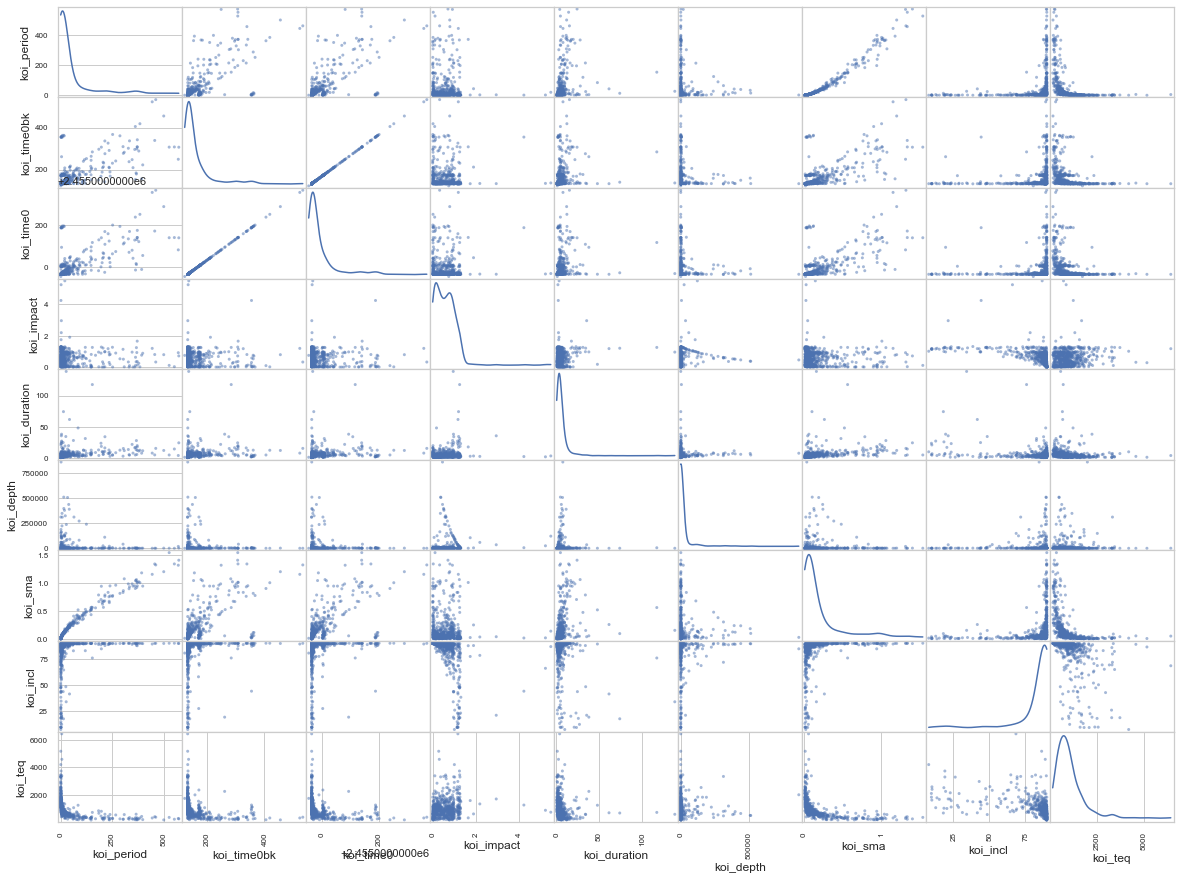

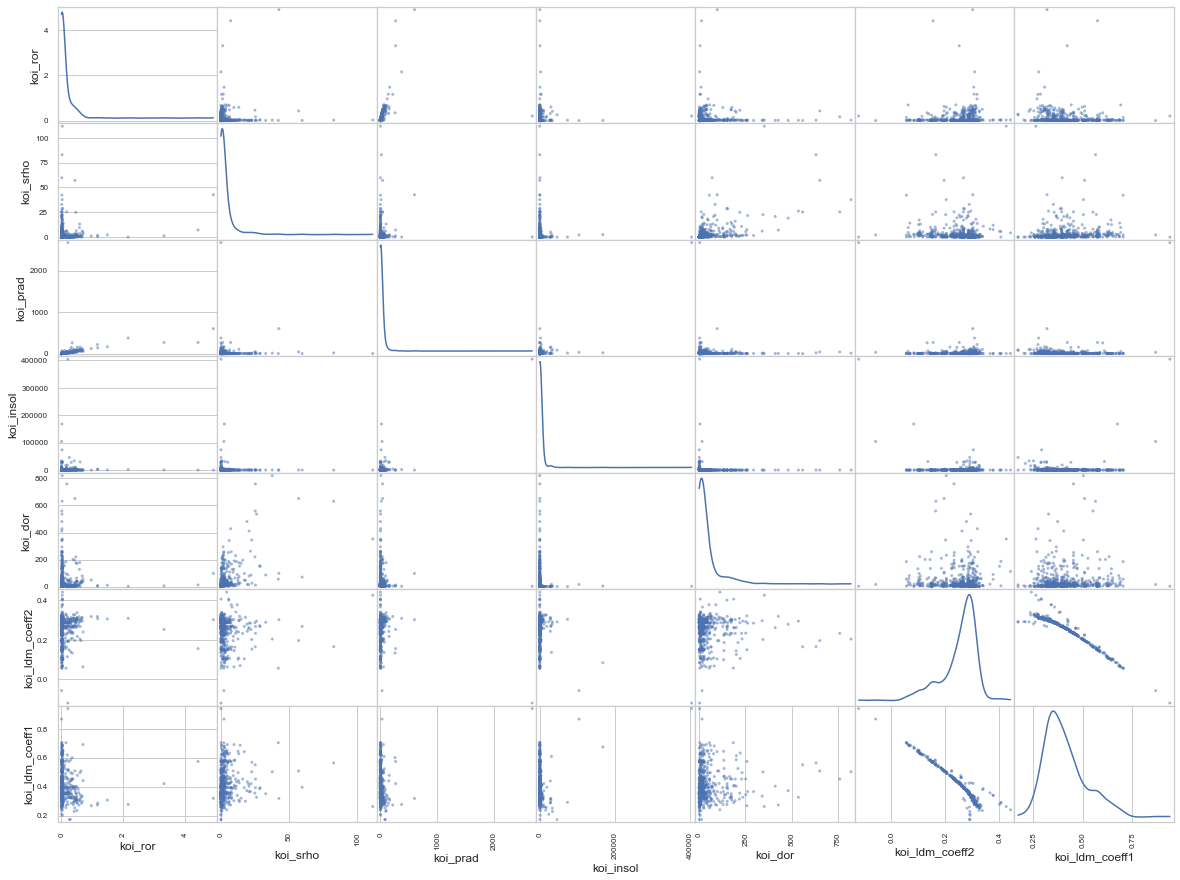

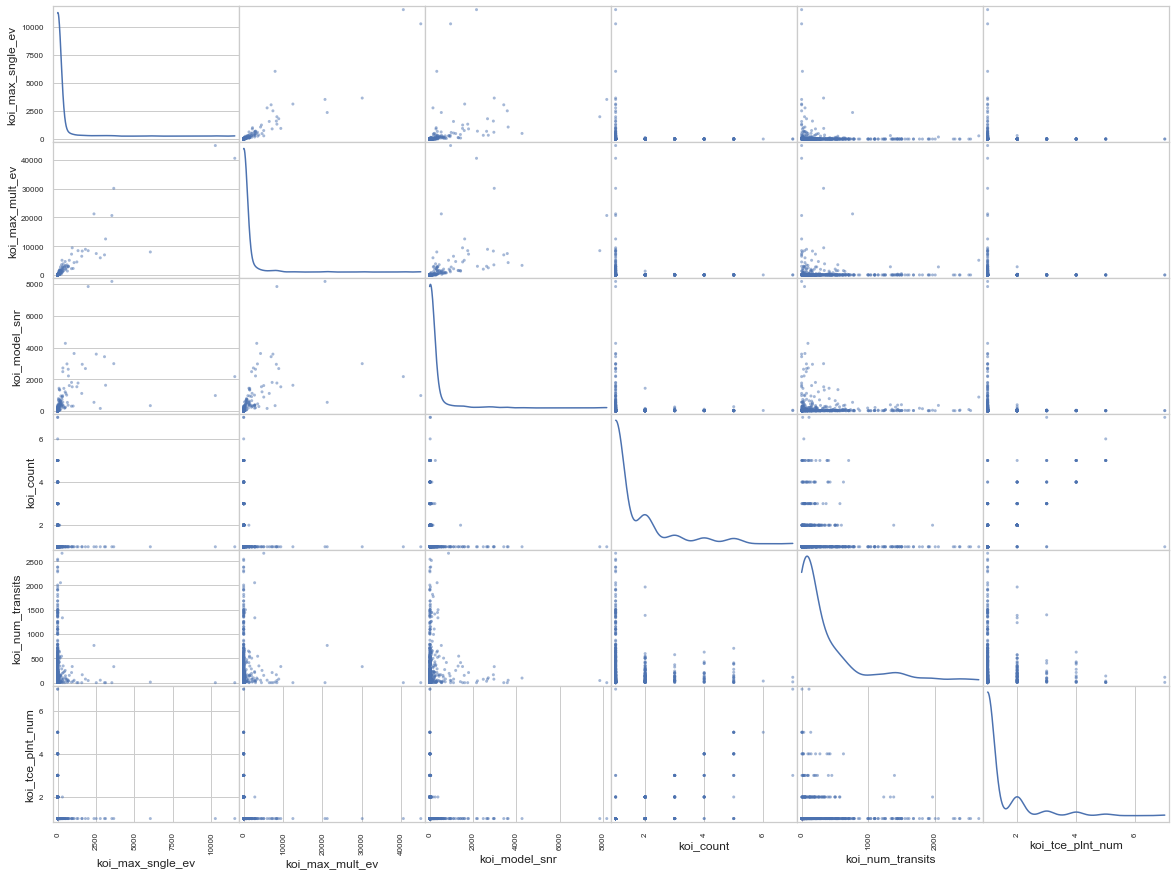

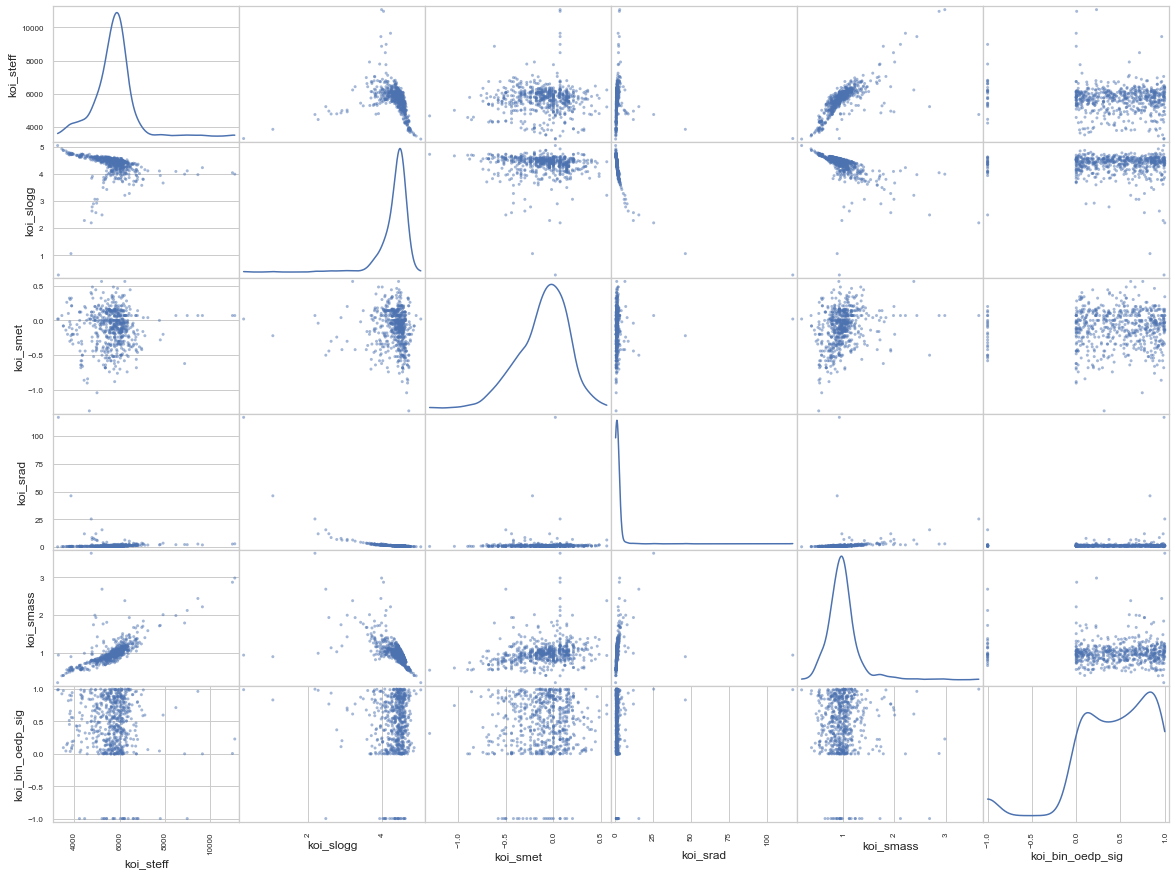

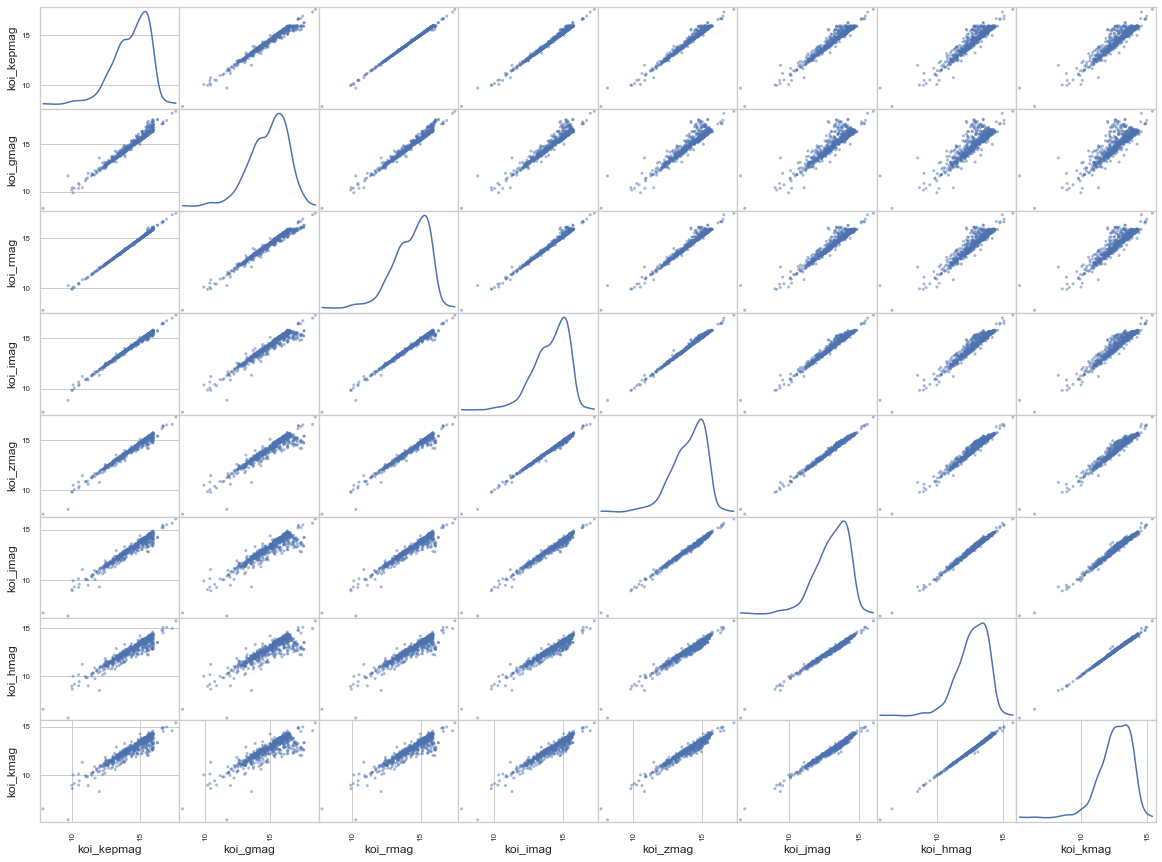

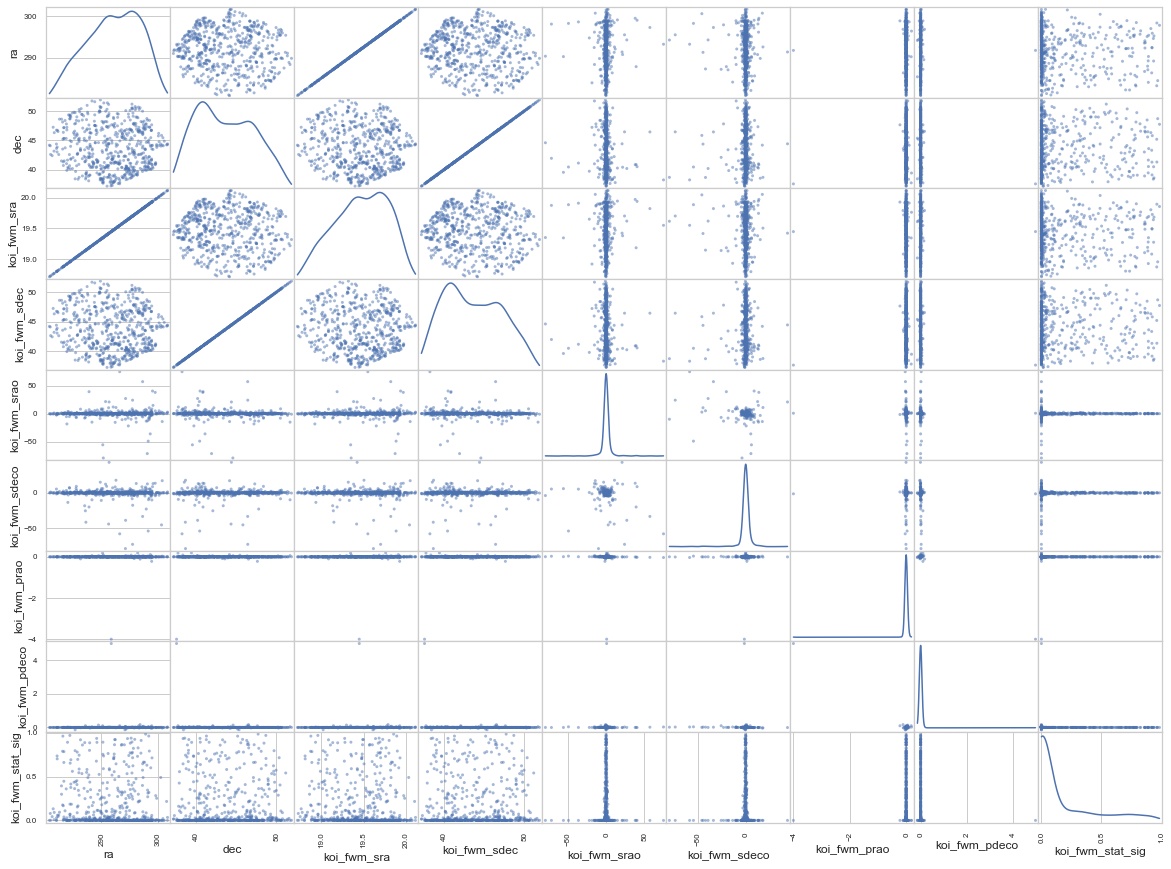

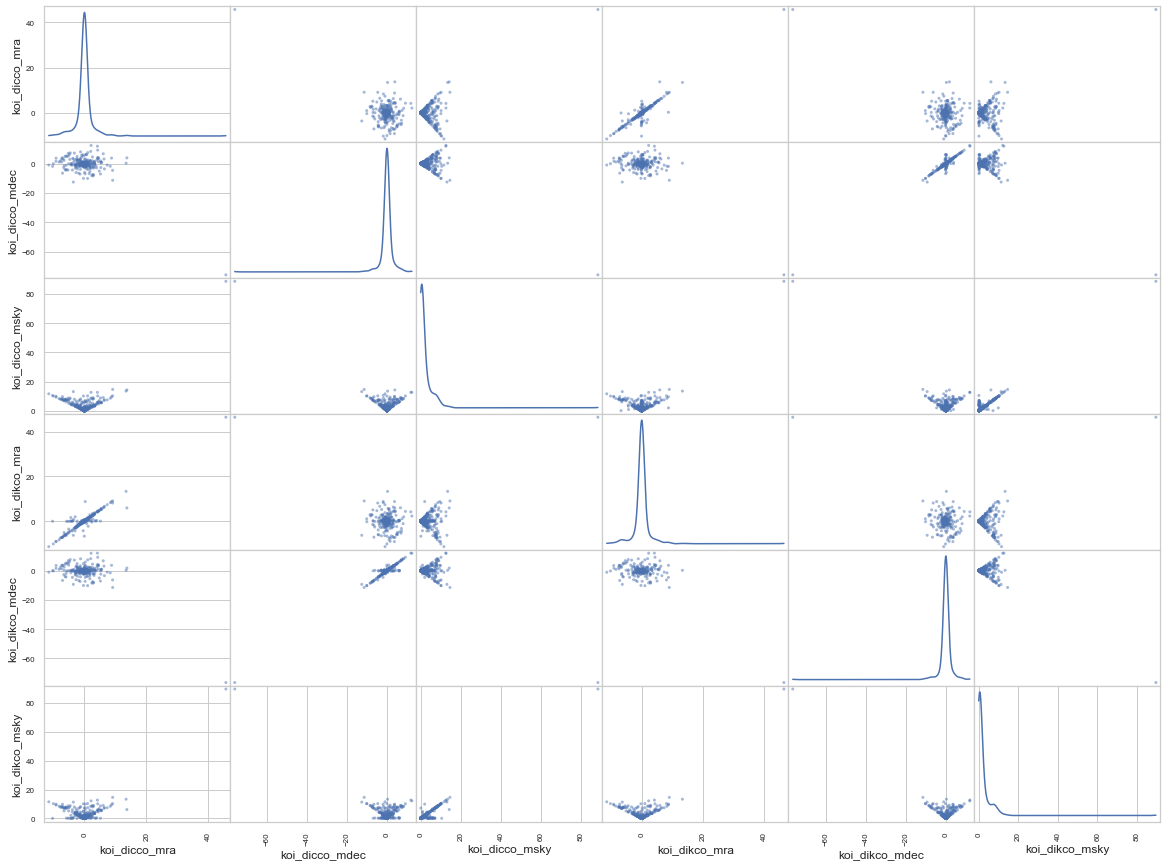

In [21]:
for x in xplot:
    pd.plotting.scatter_matrix(x, figsize=(20,15), diagonal='kde');

### Plot correlation

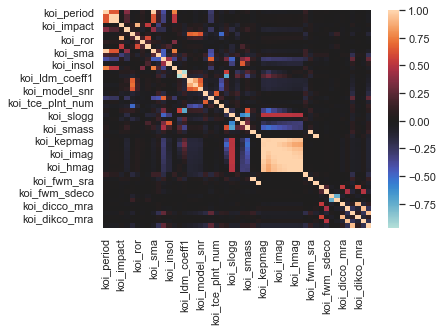

In [22]:
sns.heatmap(df_plot.corr(), center=0); # plot correlation of all features

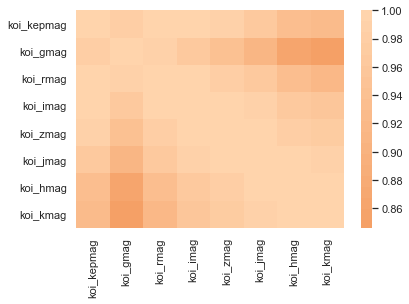

In [26]:
# plot correlation of feature subset - KIC parameters
sns.heatmap(koi_kic.corr(), center=0);

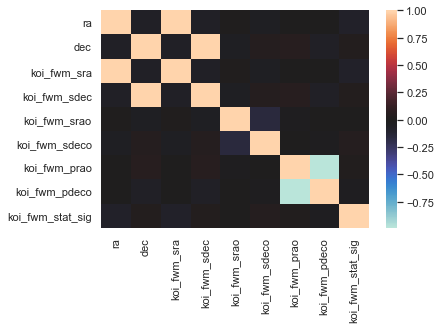

In [27]:
# plot correlation of feature subset - Pixel vetting statistics
sns.heatmap(koi_fwm.corr(), center=0);

### Outlier analysis

The data have huge outliers, if any tecnique such as IQR is applied, then 95% of the data identified as outlier, hence we will remove highly visible outliers.

In [10]:
df_outliersDropped = df_clean.copy()

df_outliersDropped.drop(df_outliersDropped[df_outliersDropped['koi_period']>10000].index,inplace=True)
df_outliersDropped.drop(df_outliersDropped[df_outliersDropped['koi_time0bk']>1400].index,inplace=True)
df_outliersDropped.drop(df_outliersDropped[df_outliersDropped['koi_impact']>70].index,inplace=True)
df_outliersDropped.drop(df_outliersDropped[df_outliersDropped['koi_duration']>100].index,inplace=True)
df_outliersDropped.drop(df_outliersDropped[df_outliersDropped['koi_depth']>10000].index,inplace=True)
df_outliersDropped.drop(df_outliersDropped[df_outliersDropped['koi_ror']>80].index,inplace=True)
df_outliersDropped.drop(df_outliersDropped[df_outliersDropped['koi_srho']>900].index,inplace=True)
df_outliersDropped.drop(df_outliersDropped[df_outliersDropped['koi_prad']>1000].index,inplace=True)
df_outliersDropped.drop(df_outliersDropped[df_outliersDropped['koi_teq']>14000].index,inplace=True)
df_outliersDropped.drop(df_outliersDropped[df_outliersDropped['koi_dor']>2000].index,inplace=True)
df_outliersDropped.drop(df_outliersDropped[df_outliersDropped['koi_max_sngle_ev']>20000].index,inplace=True)
df_outliersDropped.drop(df_outliersDropped[df_outliersDropped['koi_max_mult_ev']>50000].index,inplace=True)
df_outliersDropped.drop(df_outliersDropped[df_outliersDropped['koi_model_snr']>1000].index,inplace=True)
df_outliersDropped.drop(df_outliersDropped[df_outliersDropped['koi_srad']>100].index,inplace=True)

### Check for any missing values

In [11]:
df_outliersDropped.isnull().sum().sum()

19117

There are a lot of missing values in the dataset, we will impute the data using simpleImputer in the pipeline. Since the data had lot of outliers, we will use mean to include the weightage.

In [13]:
fig = plt.figure(figsize=(80, 400))
fig.subplots_adjust(hspace=0.2, wspace=0.1)

for i, col in enumerate(df_outliersDropped.columns):
    ax=plt.subplot(18,3,1 + i)
    sns.scatterplot(x="koi_pdisposition", y=col, data=df_outliersDropped)
    ax.tick_params(axis='both', which='major', labelsize=50)
    plt.title(col, fontdict={'fontsize': 50})

plt.show()

## Observations:

* As seen in the pair plot, every feature provides some contribution to the target variable
* The above scatter plot shows each feature distributed for the target varible. There is no significant correlation
* Though we have more data, but compared to the number of objects in the outerscape, we can assume that the kepler telescope captured only few of them. This is observed in the data are not normally distributed
* Considering all the data collected are important and though the number of outliers are more, but they are assumed not an error, hence removed only a visible outliers

# 2. Model training and validation

In [71]:
from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

np.random.seed(42)

### Split data for training and test

In [14]:
train_set, test_set = train_test_split(df_outliersDropped, test_size=0.2, random_state=42)

In [28]:
train_set, test_set = train_test_split(df_clean, test_size=0.2, random_state=42)

### Define function to train & GridSearch for any estimator

In [16]:
def modelTrain(X, y, estimator_name, estimator, param_grid, cv=3, scoring='accuracy'):
    
    #Define pipeline

    pipeline = Pipeline(steps=[
            ("imputer",SimpleImputer(strategy="mean")),
            ("scaler", StandardScaler()),
            (estimator_name, estimator)
        ])
    
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv,
                           scoring=scoring,
                           return_train_score=True)

    return grid_search.fit(X, y)


In [17]:
X_train = train_set.drop('koi_pdisposition', axis=1).astype(np.float64)
y_train = train_set['koi_pdisposition']

### Train on Linear model

In [18]:
sgd_clf = linear_model.SGDClassifier()
param_grid = [
    {'sgd_clf__max_iter': [10, 100, 1000]}
  ]

sgd_clf_model = modelTrain(X_train, y_train, 'sgd_clf', sgd_clf, param_grid, 5, 'accuracy')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packag

In [19]:
sgd_clf_model.best_params_

{'sgd_clf__max_iter': 1000}

In [31]:
X_test = test_set.drop('koi_pdisposition', axis=1).astype(np.float64)
y_test = test_set['koi_pdisposition']

y_test_pred = sgd_clf_model.predict(X_test)

In [32]:
sgd_clf_acc = accuracy_score(y_test, y_test_pred)
sgd_clf_acc, sgd_clf_model.best_score_

(0.8134651019147622, 0.8372447447447448)

The prediction on test data is better as the test score has increased from the training score

### Confusion Matrix for Linear model

(2.0, 0.0)

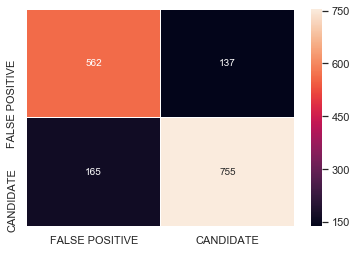

In [25]:
conf_mx = confusion_matrix(y_test, y_test_pred)
# conf_mx
conf_mx_df = pd.DataFrame(conf_mx, columns=['FALSE POSITIVE','CANDIDATE'], index=['FALSE POSITIVE','CANDIDATE'])
ax =sns.heatmap(conf_mx_df, annot=True, linewidths=.5,  fmt="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The Linear model looked to be overfit, the test score was lesser than the training score. However, it predicted fewer False positive and false negative

### Train on SVC model

In [26]:
#SVC

svc = SVC()

param_grid = [{'svc__kernel' : ['linear', 'rbf', 'poly'],
                'svc__degree' :[0, 1, 2, 3, 4, 5, 6],
              'svc__C' : [1,5,10,1000]}]



svc_model = modelTrain(X_train, y_train, 'svc', svc, param_grid, 5, 'accuracy')

In [27]:
y_test_pred = svc_model.predict(X_test)

In [30]:
svc_model.best_params_

{'svc__C': 5, 'svc__degree': 0, 'svc__kernel': 'rbf'}

In [28]:
svc_acc = accuracy_score(y_test, y_test_pred)
svc_acc, svc_model.best_score_

(0.8844966028412601, 0.8704454454454454)

The SVC performed good on prediction, the score is slightly more than the training score

### Train on Random Forest Model

In [ ]:
#RF

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_jobs=-1, random_state=42)

param_grid = [{'rfc__n_estimators' : [500, 1000, 1500],
               'rfc__max_leaf_nodes' :[15, 20, 25],
               'rfc__max_depth' : [i for i in range(8, 11)]}]

rnd_clf = modelTrain(X_train, y_train, 'rfc', rfc, param_grid, 5, 'accuracy')

In [ ]:
rnd_clf.best_params_

In [ ]:
y_pred_rf = rnd_clf.predict(X_test)

In [ ]:
rfc_acc = accuracy_score(y_test, y_pred_rf)
rfc_acc, rnd_clf.best_score_

### Confusion Matrix for SVC model

(2.0, 0.0)

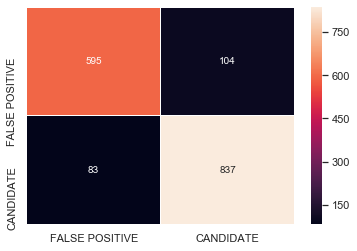

In [29]:
conf_mx = confusion_matrix(y_test, y_test_pred)
# conf_mx
conf_mx_df = pd.DataFrame(conf_mx, columns=['FALSE POSITIVE','CANDIDATE'], index=['FALSE POSITIVE','CANDIDATE'])
ax =sns.heatmap(conf_mx_df, annot=True, linewidths=.5,  fmt="d")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Train on default models

In [88]:
def init_default():
    return [
        SGDClassifier(),
        KNeighborsClassifier(),
        RandomForestClassifier(random_state=42),
        ExtraTreesClassifier(random_state=42),
        SVC(),
        DecisionTreeClassifier()
    ]

def calc_metrics(model, X, y):
    y_hat = model.predict(X)
    metrics = [accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]
    scores = [fn(y, y_hat) for fn in metrics]
    return scores

In [29]:
y_train = train_set.pop(target_attr)
X_train = train_set.copy()

In [30]:
y_test = test_set.pop(target_attr)
X_test = test_set.copy()

In [31]:
preprocess = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value=0)), # impute missing with 0s
    ('scale', StandardScaler())
])

In [32]:
X_tr = preprocess.fit_transform(X_train)
X_te = preprocess.transform(X_test)

In [94]:
models = init_default()
fit_models = []
fit_metrics = []

for model in models:
    fit_models.append(model.fit(X_tr, y_train))
    fit_metrics.append(calc_metrics(model, X_te, y_test))

In [98]:
for model, metric in zip(model_names, fit_metrics): # for comparison only - TO BE REMOVED
    print(f"{model:<22}:{metric}")

SGDClassifier         :[0.8478829064296916, 0.8415245737211635, 0.8631687242798354, 0.8522092432706958, 0.8476311209071866]
KNeighborsClassifier  :[0.8395190799790905, 0.8133836003770029, 0.8878600823045267, 0.8489916379734382, 0.8387228147973218]
RandomForestClassifier:[0.9043387349712494, 0.9359116022099447, 0.8713991769547325, 0.9025039957378795, 0.9048813100501611]
ExtraTreesClassifier  :[0.8907475169890224, 0.9097744360902256, 0.8713991769547325, 0.8901734104046243, 0.8910662197207244]
SVC                   :[0.8667015159435442, 0.868448098663926, 0.8693415637860082, 0.8688946015424165, 0.8666580295019308]
DecisionTreeClassifier:[0.8599059069524307, 0.8705263157894737, 0.8508230452674898, 0.8605619146722165, 0.8600555183829479]


In [100]:
model_names = [str(model).split('(')[0] for model in models]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC']

In [105]:
metrics = pd.DataFrame(fit_metrics, columns=metric_names, index=model_names)
metrics

Accuracy  Precision    Recall        F1       AUC
SGDClassifier           0.847883   0.841525  0.863169  0.852209  0.847631
KNeighborsClassifier    0.839519   0.813384  0.887860  0.848992  0.838723
RandomForestClassifier  0.904339   0.935912  0.871399  0.902504  0.904881
ExtraTreesClassifier    0.890748   0.909774  0.871399  0.890173  0.891066
SVC                     0.866702   0.868448  0.869342  0.868895  0.866658
DecisionTreeClassifier  0.859906   0.870526  0.850823  0.860562  0.860056

### Tune ExtraTrees model

In [82]:
drop_list = [
    'koi_time0bk', # high corr with koi_time0
    'koi_fwm_sra','koi_fwm_sdec', # high corr with ra, dec
    'koi_imag', # high corr with kepmag, zmag
    'koi_jmag', # high corr with zmag, hmag, kmag
]

# drop columns of redundant features
X_tr_red = X_train.drop(drop_list, axis=1)
X_te_red = X_test.drop(drop_list, axis=1)
# X_tr_red.shape (1913, 46)

In [84]:
preprocess = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value=0)), # impute missing with 0s
    ('scale', StandardScaler())
])

X_tr1 = preprocess.fit_transform(X_tr_red)
X_te1 = preprocess.transform(X_te_red)

In [106]:
# train on default models with reduced dataset
models_red = init_default()
fit_models = []
fit_metrics = []

for model in models_red:
    fit_models.append(model.fit(X_tr1, y_train))
    fit_metrics.append(calc_metrics(model, X_te1, y_test))
    
metrics = pd.DataFrame(fit_metrics, columns=metric_names, index=model_names)
metrics

Accuracy  Precision    Recall        F1       AUC
SGDClassifier           0.836383   0.832492  0.848765  0.840550  0.836179
KNeighborsClassifier    0.841087   0.816888  0.885802  0.849951  0.840351
RandomForestClassifier  0.901725   0.922414  0.880658  0.901053  0.902072
ExtraTreesClassifier    0.894929   0.915858  0.873457  0.894155  0.895283
SVC                     0.865656   0.872008  0.862140  0.867046  0.865714
DecisionTreeClassifier  0.861997   0.875796  0.848765  0.862069  0.862215

In [107]:
for model, metric in zip(model_names, fit_metrics): # for comparison only - TO BE REMOVED
    print(f"{model:<22}:{metric}")

SGDClassifier         :[0.836382645060115, 0.8324924318869829, 0.8487654320987654, 0.8405501782985226, 0.8361786777922096]
KNeighborsClassifier  :[0.8410872974385781, 0.816888045540797, 0.8858024691358025, 0.8499506416584403, 0.8403507563532361]
RandomForestClassifier:[0.9017250392054365, 0.9224137931034483, 0.8806584362139918, 0.9010526315789474, 0.9020720448870172]
ExtraTreesClassifier  :[0.894929430214323, 0.9158576051779935, 0.8734567901234568, 0.8941548183254344, 0.8952831240734183]
SVC                   :[0.865656037637219, 0.8720083246618107, 0.8621399176954733, 0.8670460424211072, 0.8657139545969397]
DecisionTreeClassifier:[0.861996863565081, 0.8757961783439491, 0.8487654320987654, 0.8620689655172413, 0.8622148095669173]


In [126]:
variance = 0.95
pca_pipeline = Pipeline([
    ('standardize', StandardScaler()), # scale to center data for PCA
    ('PCA', PCA(n_components=variance)), # apply PCA with n_components of 0.95 variance ratio
])

preprocess = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value=0)), # impute missing with 0s
    ('scale', StandardScaler())
])

num_attr = list(X_test) # get list of all features
pca_attr = ['koi_kepmag','koi_gmag','koi_rmag','koi_imag','koi_zmag','koi_jmag','koi_hmag','koi_kmag'] # get subset for PCA
pca_subset = ColumnTransformer([
    ('preprocess', preprocess, num_attr), # impute and scale to center data for PCA
    ('PCA', PCA(n_components=variance), pca_attr), # apply PCA with n_components of 0.95 variance ratio
])

In [76]:
# setup parameter search grid
n_range = np.arange(100, 500, 10)
maxlist = np.arange(2, 51, 1)
minsamples = np.arange(700, 1500, 10)
minleaf = np.arange(250, 500, 5)
maxleaf = np.arange(20, 76, 1)

param_grid_et = [{
    'n_estimators': n_range,
    'criterion': ["gini", "entropy"],
    'max_depth': maxlist,
    'min_samples_split': minsamples,
    'min_samples_leaf' : minleaf,
    'max_leaf_nodes'   : maxleaf
}]

et_clf = RandomizedSearchCV(ExtraTreesClassifier(random_state=42), param_grid_et, n_iter=100, 
                                      n_jobs=4, cv=3, scoring='accuracy', random_state=42)

In [113]:
et_clf_full = et_clf.fit(X_tr, y_train)
print(et_clf_full.best_params_)

et_clf_full.score(X_te, y_test)

{'n_estimators': 450, 'min_samples_split': 1070, 'min_samples_leaf': 260, 'max_leaf_nodes': 32, 'max_depth': 40, 'criterion': 'entropy'}


0.8322007318348145

ET with tuned hyperparameters yielded lower accuracy compared to default ET trained with reduced dataset

In [114]:
# apply PCA to all features
X_tr_pca = pca_pipeline.fit_transform(X_tr) 
X_te_pca = pca_pipeline.transform(X_te)

# refit model
et_clf_pca = et_clf.fit(X_tr_pca, y_train)
print(et_clf_pca.best_params_)

et_clf_pca.score(X_te_pca, y_test)

{'n_estimators': 450, 'min_samples_split': 1070, 'min_samples_leaf': 260, 'max_leaf_nodes': 32, 'max_depth': 40, 'criterion': 'entropy'}


0.8018818609513853

PCA on all features did not improve accuracy score

## 3. Conclusion

The SVC performed better than the linear model, It prediected less false negative and false positive compared to Linear. Since the data don't look represent the complete population, they are not normally distributed. We will need to include most of the outliered data to train the model. This is because not to loose all important data, they are not considered as error in collection.